#Descripción del dataset


Hemos escogido este dataset porque nos parecía muy interesante el hecho de poder analizar las causas por las que una canción se hace popular en Spotify, plataforma de música en streaming usada en todo el mundo.

Contamos con las siguientes variables:

*  **Popularidad (popu)**: mide la popularidad de una canción en una escala de 0 a 100. Cuanto más cerca del 100, más popular es la canción.

*   **Género musical (genre)**: ha sido dividido en **pop** y **no pop** para simplificar el análisis, ya que los géneros **no pop** eran muchos y muy dispersos.

*   **Año (year)**: los años van desde el 2010 hasta el 2019 ambos inclusive, y han sido agrupados en dos grupos: de **2010 a 2014** y de **2015 a 2019**. De esta manera agrupamos los datos en "más actuales" y "más antiguos" y podremos observar claramente las disferencias en el caso de que las hubiera.
*   **Pulsaciones por minuto (bpm)**: es el tempo de la canción. Esta medido en una escala de 0 al 210. Cuanto más alto el valor, más beats per minute.
*   **Energía (nrgy)**: mide la cuán energética es la cancion en una escala de 0 a 100. Cuanto más alto sea el valor, más energía tendrá la canción.
*   **Bailabilidad (dnce)**: mide lo bailable que pueda ser una canción en una escala de 0 a 100. A mayor puntuación, más fácil será bailar esa canción.
*   **Valencia (val)**: mide el "estado de ánimo" de la canción en una escala de 0 a 100. Cuanto más cerca del 100, más positiva será la canción. Esta variable ha sido categorizada para obtener una variable cualitativa más. 
*   **Duración (dur)**: representa lo larga que es la canción en segundos. Esta variable ha sido categorizada para agrupar las canciones según su mayor o menor duración, ya que hemos considerado que los segundos exactos no son relevantes.
*   **Letra (lyrics)**: indica en un índice de 0 a 100 la parte cantada de una canción. A mayor puntuación, mayor parte cantada tendrá esa canción.




In [41]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  
from scipy.stats.stats import pearsonr
from statsmodels.formula.api import ols

from google.colab import drive

In [42]:
drive.mount('mydrive')

Drive already mounted at mydrive; to attempt to forcibly remount, call drive.mount("mydrive", force_remount=True).


In [43]:
spoti = pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/spotify.csv", sep= ";")
spoti

,ID,title,artist,genre,year,bpm,nrgy,dnce,val,dur,lyrics,popu
0,1,"Hey, Soul Sister",Train,no pop,2010,97,89,67,80,217,4,83
1,2,Love The Way You Lie,Eminem,no pop,2010,87,93,75,64,263,23,82
2,3,TiK ToK,Kesha,pop,2010,120,84,76,71,200,14,80
3,4,Bad Romance,Lady Gaga,pop,2010,119,92,70,71,295,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,221,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,16,176,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,61,206,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,2019,136,76,53,65,260,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,24,217,7,69


#Formulación de Hipótesis preanálisis

H1. Cuando la canción sea pop, más popular será.

H2. Cuando más actual sea el año, más índice de popularidad.

H3. Si la canción tiene más ritmo, más popular será.

H4. Si la canción es más energética, más popular será.

H5. Cuanto más bailable sea la canción, más popularidad.

H6. Cuanto menos triste sea la canción, más popularidad.

H7. Si la canción es larga, más popular será.

H8. Si la canción tiene más contenido cantable (lyrics), más popular será.

# 1.Popularidad (Variable Target)


###Descripción

In [44]:
popu = spoti['popu'].describe()
popu

count    603.000000
mean      66.620232
std       14.264471
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: popu, dtype: float64

In [45]:
n = popu[0]
m_popu = popu[1]
sd_popu = popu[2]

###Gráfico

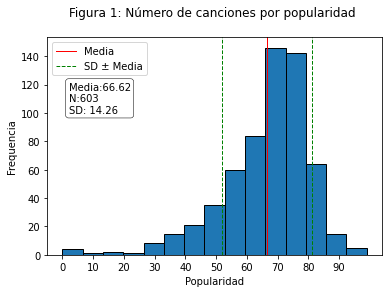

In [46]:
popularidad = spoti['popu']
plt.hist(popularidad, bins=15, edgecolor='black')
plt.xlabel('Popularidad')
plt.xticks(np.arange(0, 100, step= 10))
plt.ylabel('Frequencia')
props = dict(boxstyle= 'round', facecolor='white', lw=0.5)
plt.text(2,100,'Media:66.62''\n''N:603' '\n' 'SD: 14.26', bbox=props)
plt.title('Figura 1: Número de canciones por popularidad ''\n')
plt.axvline(66.52, linewidth=1, linestyle='solid', color = 'red')
plt.axvline(52, linewidth=1, linestyle= 'dashed', color= 'green')
plt.axvline(81.04, linewidth=1, linestyle= 'dashed', color= 'green')
plt.legend(labels=['Media', 'SD ± Media'])
plt.show()

# 2.Género

###Descripción

In [47]:
gen = spoti.genre.describe()
gen

count     603
unique      2
top       pop
freq      468
Name: genre, dtype: object

In [48]:
gen_table = spoti.groupby(['genre']).size()
print(gen_table)
n=gen_table.sum()
gen_table2 = (gen_table/n)*100
print(gen_table2)
n=gen_table.sum()

genre
no pop    135
pop       468
dtype: int64
genre
no pop    22.38806
pop       77.61194
dtype: float64


###Gráfico

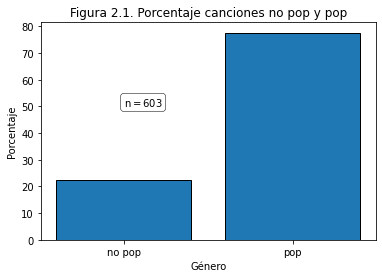

In [49]:
bar_list = ['no pop', 'pop']
plt.bar(bar_list, gen_table2, edgecolor='black')
plt.title("Figura 2.1. Porcentaje canciones no pop y pop")
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.text(0,50,'n: 603')
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{n}=%.0f$'%(n)
plt.text (0,50, textstr , bbox=props)
plt.show()

###Comparación con popu

In [50]:
pop_no_popu=spoti.loc[spoti.genre=='no pop', "popu"]
pop_popu=spoti.loc[spoti.genre=='pop', "popu"] 

res = stats.f_oneway(pop_no_popu,pop_popu)
print(res)

F_onewayResult(statistic=0.013964697187775635, pvalue=0.9059706057171695)


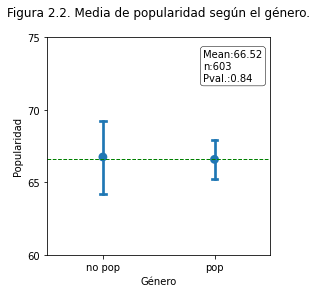

In [51]:
plt.figure(figsize=(4,4))
ax = sns.pointplot(x="genre", y="popu", data=spoti,capsize=0.05, ci=95, join=0, order=['no pop', 'pop'])
ax.set_ylabel('Popularidad')
plt.yticks(np.arange(60, 80, step=5))
plt.axhline(y=spoti['popu'].mean(),linewidth=1,linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.9,72,'Mean:66.52''\n''n:603''\n' 'Pval.:0.84', bbox=props)
plt.xlabel('Género')
plt.title('Figura 2.2. Media de popularidad según el género.''\n')
plt.show()

###Miniconclusión

Como el p valor es mayor de 0.05, aceptamos la hipótesis nula. La popularidad no cambia significativamente si una canción es pop o no pop.

#3.Año

###Descripción

In [52]:
spoti.year.describe()
mytable = spoti.groupby(['year']).size()
print(mytable)
n = mytable.sum()
mytable2 = (mytable/n)*100
print(mytable2)

year
2010    51
2011    53
2012    35
2013    71
2014    58
2015    95
2016    80
2017    65
2018    64
2019    31
dtype: int64
year
2010     8.457711
2011     8.789386
2012     5.804312
2013    11.774461
2014     9.618574
2015    15.754561
2016    13.266998
2017    10.779436
2018    10.613599
2019     5.140962
dtype: float64


In [53]:
spoti.loc[(spoti['year']==2010),"year2"] = "2010-2014"
spoti.loc[(spoti['year']==2011),"year2"] = "2010-2014"
spoti.loc[(spoti['year']==2012),"year2"] = "2010-2014"
spoti.loc[(spoti['year']==2013),"year2"] = "2010-2014"
spoti.loc[(spoti['year']==2014),"year2"] = "2010-2014"
spoti.loc[(spoti['year']==2015),"year2"] = "2015-2019"
spoti.loc[(spoti['year']==2016),"year2"] = "2015-2019"
spoti.loc[(spoti['year']==2017),"year2"] = "2015-2019"
spoti.loc[(spoti['year']==2018),"year2"] = "2015-2019"
spoti.loc[(spoti['year']==2019),"year2"] = "2015-2019"

pd.crosstab(spoti.year, spoti.year2)

year2,2010-2014,2015-2019
year,,
2010,51,0
2011,53,0
2012,35,0
2013,71,0
2014,58,0
2015,0,95
2016,0,80
2017,0,65
2018,0,64


In [54]:
spoti.year2.describe()
mytable3 = spoti.groupby(['year2']).size()
n = mytable.sum()
mytable4 = (mytable3/n)*100

###Gráfico

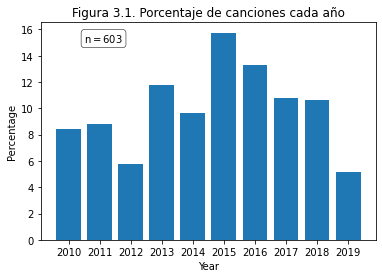

In [55]:
barlist = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
plt.bar(barlist, mytable2)
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.title('Figura 3.1. Porcentaje de canciones cada año')
plt.text(0.5,15,'n: 603')
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{n}=%.0f$'%(n)
plt.text (0.5,15, textstr , bbox=props)
plt.show()

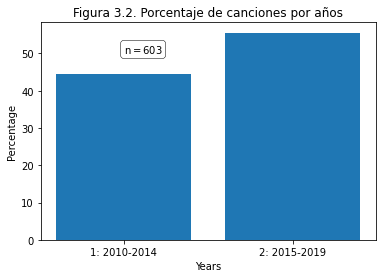

In [56]:
barlist2 = ['1: 2010-2014', '2: 2015-2019']
plt.bar(barlist2, mytable4)
plt.ylabel('Percentage')
plt.xlabel('Years')
plt.title('Figura 3.2. Porcentaje de canciones por años')
plt.text(0,50,'n: 603')
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{n}=%.0f$'%(n)
plt.text (0,50, textstr , bbox=props)
plt.show()

###Comparación con popu

In [57]:
spoti.groupby('year2').popu.mean()

year2
2010-2014    63.835821
2015-2019    68.847761
Name: popu, dtype: float64

In [58]:
popu10_14 = spoti.loc[spoti.year2=='2010-2014', 'popu']
popu15_19 = spoti.loc[spoti.year2=='2015-2019', 'popu']

res= stats.stats.ttest_ind(popu10_14, popu15_19, equal_var=False)
print(round(res[1],3), round(res[0],3))

0.0 -4.328


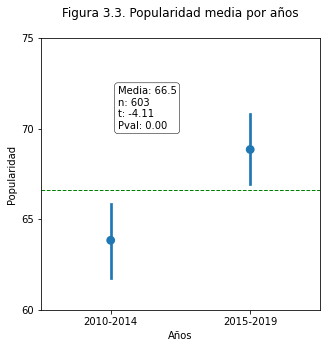

In [59]:
plt.figure(figsize=(5,5))
ax = sns.pointplot(x= 'year2', y= 'popu',
                   data= spoti, ci= 99, join=0)

plt.yticks(np.arange(60,80, step=5))
plt.axhline(y=spoti.popu.mean(), linewidth=1, linestyle = 'dashed', color='green')
ax.set_ylabel('Popularidad')

props= dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.05,70,'Media: 66.5' '\n' 'n: 603' '\n' 't: -4.11' '\n' 'Pval: 0.00', bbox=props)
plt.xlabel('Años')
plt.title('Figura 3.3. Popularidad media por años''\n')
plt.show()

###Miniconclusión

Concluimos que las variables año y popularidad están relacionadas y que existen diferencias estadísticamente significativas entre los grupos. Podemos afirmar esto basándonos en el p valor menor a 0,05 que nos ha devuelto la prueba estadística t-student, el cual rechaza la H0 de que los grupos son iguales.

#4.Beats per minute (bpm)


###Descripción

In [60]:
res = spoti.bpm.describe().round(3)
res

count    603.000
mean     118.736
std       24.320
min       43.000
25%      100.000
50%      120.000
75%      129.000
max      206.000
Name: bpm, dtype: float64

In [61]:
m  = res[1]
sd = res[2]
n  = res[0]
print("Mean:",m,"\n","Standard Deviation:",sd,"\n","N:",n)

Mean: 118.736 
 Standard Deviation: 24.32 
 N: 603.0


###Gráfico

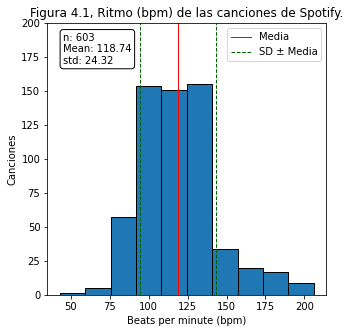

In [62]:
plt.figure(figsize=(5,5))
x=spoti.bpm
plt.hist (x, bins=10,edgecolor="black")
plt.title("Figura 4.1, Ritmo (bpm) de las canciones de Spotify.")
plt.xlabel("Beats per minute (bpm)")
plt.ylabel("Canciones")
props = dict (boxstyle="round", facecolor ="white", lw =1)
plt.xticks(np.arange(50, 225, step=25))
plt.yticks(np.arange(0, 225, step=25))
plt.text(45, 170, "n: 603" "\n" "Mean: 118.74" "\n" "std: 24.32", bbox=props)
plt.axvline(x=m, linewidth=1, linestyle= 'solid',color="red", label='Mean')
plt.axvline(x=(m+sd) , linewidth=1, linestyle= 'dashed',color="darkgreen", label='m + sd')
plt.axvline(x=(m-sd), linewidth=1, linestyle= 'dashed',color="darkgreen", label='m - sd')
plt.legend(labels=['Media', 'SD ± Media'])
plt.show()

###Comparación con popu

In [63]:
x= spoti.bpm
y=spoti["popu"]
pearsonr (x,y)
r, p_val = pearsonr(x,y)
n = len(spoti["popu"])
print('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

r: -0.018 P.Val: 0.659 n: 603


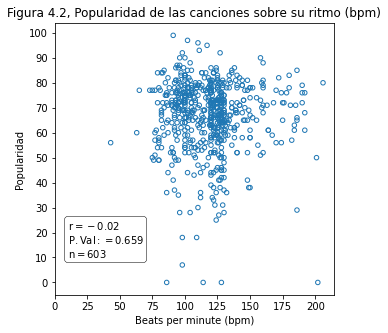

In [64]:
plt.figure(figsize=(5,5))
x= spoti.bpm
y=spoti["popu"]
plt.scatter (x, y, s=20, facecolors="none", edgecolors="C0")
plt.xticks(np.arange(0,225,step=25))
plt.yticks(np.arange(0,110,step=10))
plt.title("Figura 4.2, Popularidad de las canciones sobre su ritmo (bpm)")
plt.xlabel("Beats per minute (bpm)")
plt.ylabel("Popularidad")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (10,10, textstr , bbox=props)
plt.show()

###Miniconclusión

Al ser el p-value mayor de 0.05, no se rechaza la hipótesis nula. El ritmo de las canciones (bpm), no tiene relación con la popularidad de las canciones.

#5.Energía

###Descripción

In [65]:
res= spoti.nrgy.describe().round(3)
res

count    603.000
mean      70.620
std       16.055
min        4.000
25%       61.000
50%       74.000
75%       82.000
max       98.000
Name: nrgy, dtype: float64

In [66]:
m = res[1]
sd = res[2]
n  = res[0]
print("Mean:",m,"\n","Standard Deviation:",sd,"\n","N:",n)

Mean: 70.62 
 Standard Deviation: 16.055 
 N: 603.0


###Gráfico

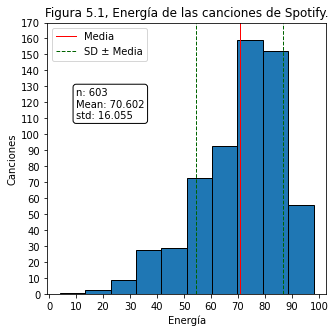

In [67]:
plt.figure(figsize=(5,5))
x=spoti.nrgy
plt.hist (x, bins=10,edgecolor="black")
plt.title("Figura 5.1, Energía de las canciones de Spotify.")
plt.xlabel("Energía")
plt.ylabel("Canciones")
props = dict (boxstyle="round", facecolor ="white", lw =1)
plt.xticks(np.arange(0, 101, step=10))
plt.yticks(np.arange(0, 175, step=10))
plt.text(10, 110, "n: 603" "\n" "Mean: 70.602" "\n" "std: 16.055", bbox=props)
plt.axvline(x=m, linewidth=1, linestyle= 'solid',color="red", label='Mean')
plt.axvline(x=(m+sd) , linewidth=1, linestyle= 'dashed',color="darkgreen", label='m + sd')
plt.axvline(x=(m-sd), linewidth=1, linestyle= 'dashed',color="darkgreen", label='m - sd')
plt.legend(labels=['Media', 'SD ± Media'])
plt.show()

###Comparación con popu

In [68]:
x= spoti.nrgy
y=spoti["popu"]
pearsonr (x,y)
r, p_val = pearsonr(x,y)
n = len(spoti["popu"])
print('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

r: -0.094 P.Val: 0.021 n: 603


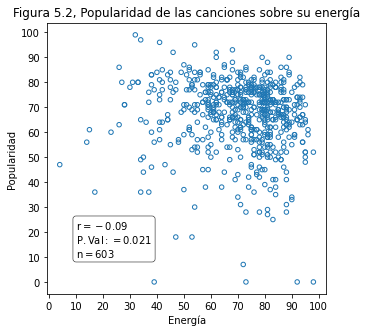

In [69]:
plt.figure(figsize=(5,5))
x= spoti.nrgy
y=spoti["popu"]
plt.scatter (x, y, s=20, facecolors="none", edgecolors="C0")
plt.xticks(np.arange(0,110,step=10))
plt.yticks(np.arange(0,110,step=10))
plt.title("Figura 5.2, Popularidad de las canciones sobre su energía")
plt.xlabel("Energía")
plt.ylabel("Popularidad")
props =dict(boxstyle ="round", facecolor ="white", lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (10,10, textstr , bbox=props)
plt.show()

###Miniconclusión

Como el p-value es menor que 0.05, se rechaza la hipótesis nula. La energía de la canciones tiene relación con la popularidad de las canciones.


#6.Danzabilidad

###Descripción

In [70]:
dance = spoti['dnce'].describe()
dance

count    603.000000
mean      64.462687
std       13.131706
min       23.000000
25%       57.000000
50%       66.000000
75%       73.000000
max       97.000000
Name: dnce, dtype: float64

In [71]:
n = dance[0]
m_dance = dance[1]
sd_dance = dance[2]

###Gráfico

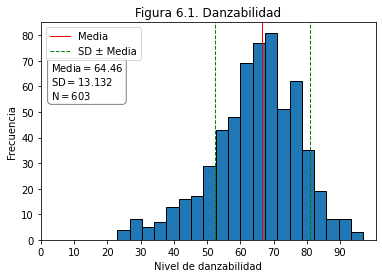

In [72]:
x=spoti['dnce']
plt.hist(x,edgecolor='black',bins=20)
plt.xticks(np.arange(0,100, step=10))
plt.title("Figura 6.1. Danzabilidad")
plt.ylabel('Frecuencia')
plt.xlabel('Nivel de danzabilidad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{Media}=%.2f$\n$\mathrm{SD}=%.3f$\n$\mathrm{N}=%.0f$'%(m_dance, sd_dance, n)
plt.text (3,55, textstr , bbox=props)
plt.axvline(x=m_popu, linewidth=1, linestyle= 'solid', color="red", label='Mean')
plt.axvline(x=m_popu-sd_popu, linewidth=1, linestyle= 'dashed', color="green", label='- 1 S.D.')
plt.axvline(x=m_popu + sd_popu, linewidth=1, linestyle= 'dashed', color="green", label='+ 1 S.D.')
plt.legend(labels=['Media', 'SD ± Media'])
plt.show()

###Comparación con popu

In [73]:
x=spoti['dnce']
y=spoti['popu']
pearsonr(x,y)

r, p_val=pearsonr(x,y)

print(r,p_val)

print ('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

0.08314615964216698 0.04124678792324346
r: 0.083 P.Val: 0.041 n: 603.0


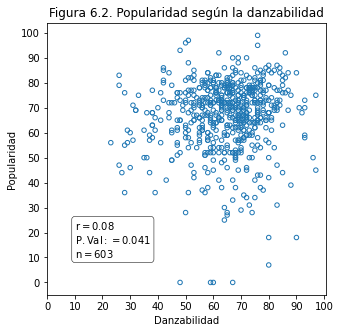

In [74]:
plt.figure(figsize=(5,5))
plt.scatter(spoti['dnce'], spoti['popu'], s=20, facecolors='none', edgecolors='C0')
plt.xticks(np.arange(0, 110, step=10))
plt.yticks(np.arange(0, 110, step=10))
plt.title("Figura 6.2. Popularidad según la danzabilidad")
plt.ylabel('Popularidad')
plt.xlabel('Danzabilidad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (10,10, textstr , bbox=props)
plt.show()

###Miniconclusión

Como el p valor es menor de 0.05, rechazamos la hipótesis nula y decimos que las variables tienen diferencias estadísticamente significativas.

#7.Valencia

###Descripcion

In [75]:
res= spoti.val.describe()
print(res)
m = res[1]
sd = res[2]
n = res[0]

count    603.000000
mean      52.308458
std       22.412200
min        4.000000
25%       35.000000
50%       52.000000
75%       69.000000
max       98.000000
Name: val, dtype: float64


###Recodificación

In [76]:
spoti.loc[(spoti['val']<(m-sd)),"val2"] = "Puntuación Baja"
spoti.loc[(spoti['val']>=(m-sd)) & (spoti['val']<(m+sd)),"val2"] = "Puntuación Media"
spoti.loc[(spoti['val']>(m+sd)),"val2"] = "Puntuación Alta"

my_categories=["Puntuación Baja", "Puntuación Media", "Puntuación Alta"]
val_type = CategoricalDtype(categories=my_categories, ordered=True)
spoti["val2"]=spoti.val2.astype(val_type)
spoti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ID      603 non-null    int64   
 1   title   603 non-null    object  
 2   artist  603 non-null    object  
 3   genre   603 non-null    object  
 4   year    603 non-null    int64   
 5   bpm     603 non-null    int64   
 6   nrgy    603 non-null    int64   
 7   dnce    603 non-null    int64   
 8   val     603 non-null    int64   
 9   dur     603 non-null    int64   
 10  lyrics  603 non-null    int64   
 11  popu    603 non-null    int64   
 12  year2   603 non-null    object  
 13  val2    603 non-null    category
dtypes: category(1), int64(9), object(4)
memory usage: 62.1+ KB


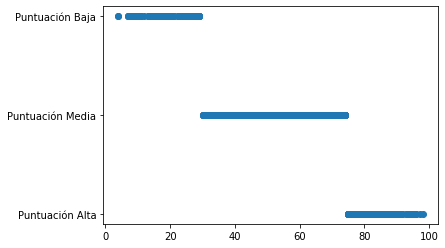

In [77]:
plt.scatter(spoti.val, spoti.val2)
plt.show()

In [78]:
spoti.val2.describe()
mytable = spoti.groupby(['val2']).size()
n = mytable.sum()
mytable2 = (mytable/n)*100
print(mytable2)

val2
Puntuación Baja     18.242123
Puntuación Media    63.018242
Puntuación Alta     18.739635
dtype: float64


###Gráfico

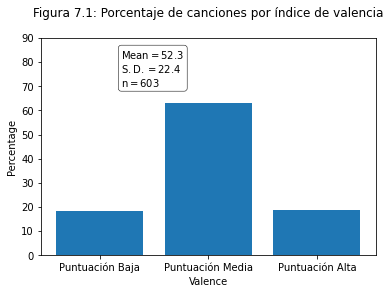

In [79]:
barlist = ["Puntuación Baja", "Puntuación Media", "Puntuación Alta"]
plt.bar(barlist, mytable2)
plt.ylabel('Percentage')
plt.xlabel('Valence')
plt.yticks(np.arange(0, 100, step= 10))
props = dict(boxstyle='round', facecolor='white',lw=0.5)
textstr = '$\mathrm{Mean}=%.1f$\n$\mathrm{S.D.}=%.1f$\n$\mathrm{n}=%.0f$'%(m, sd, n)
plt.text (0.2,70, textstr , bbox=props)
plt.title('Figura 7.1: Porcentaje de canciones por índice de valencia''\n')



plt.show()

###Comparación con popu

In [80]:
spoti.groupby('val2').popu.mean()

popu_high = spoti.loc[spoti.val2=='Puntuación Alta', 'popu']
popu_avg = spoti.loc[spoti.val2=='Puntuación Media', 'popu']
popu_low = spoti.loc[spoti.val2=='Puntuación Baja', 'popu']

res= stats.f_oneway(popu_low,popu_avg,popu_high)
print(round(res[0],3),'\n',round(res[1],3))

1.186 
 0.306


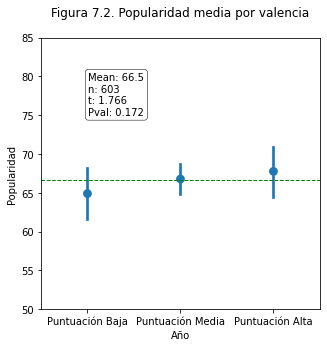

In [81]:
plt.figure(figsize=(5,5))
ax = sns.pointplot(x= 'val2', y= 'popu',
                   data= spoti, ci= 99, join=0)

plt.yticks(np.arange(50,90, step=5))
plt.axhline(y=spoti.popu.mean(), linewidth=1, linestyle = 'dashed', color='green')
ax.set_ylabel('Popularidad')

props= dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.01,75,'Mean: 66.5' '\n' 'n: 603' '\n' 't: 1.766' '\n' 'Pval: 0.172', bbox=props)
plt.xlabel('Año')
plt.title('Figura 7.2. Popularidad media por valencia''\n')
plt.show()

###Miniconclusion

Gracias al p valor mayor a 0,05, aceptamos la H0 y concluimos en que las variables no están relacionadas y no existen diferencias significativamente estadísticas.

#8.Durabilidad

###Descripción

In [82]:
print(spoti.dur.describe())

count    603.000000
mean     224.674959
std       34.130059
min      134.000000
25%      202.000000
50%      221.000000
75%      239.500000
max      424.000000
Name: dur, dtype: float64


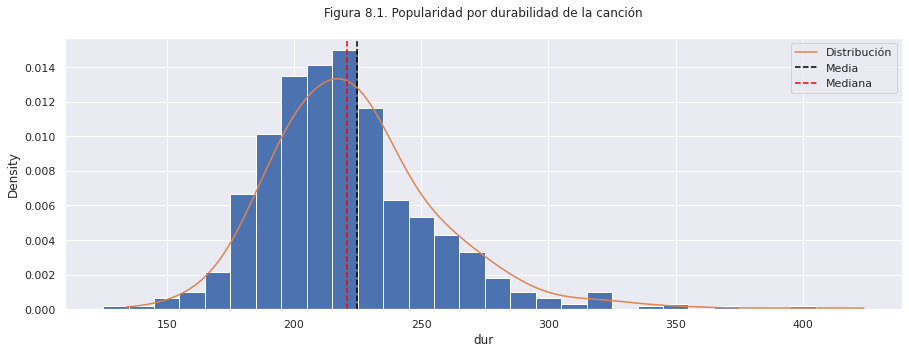

In [83]:
plt.figure(figsize=(15, 5))
sns.set_theme()

ax = plt.hist(x=spoti['dur'], density=True, bins=range(130,430,10), align="left")
ax = sns.kdeplot(data=spoti, x='dur', bw_adjust = 1.3, cut = 0, palette="crest")
ax.axvline(x=spoti.dur.mean(), color='black', linestyle="--")
ax.axvline(x=spoti.dur.median(), color='red', linestyle="--")
ax.legend(labels=['Distribución', 'Media', 'Mediana'])
plt.title('Figura 8.1. Popularidad por durabilidad de la canción''\n')
plt.show()

###Recodificación

Para la categorización de la variable cuantitativa "durabilidad", se ha optado a escoger la mediana como criterio de recodificación puesto que la durabilidad no sigue una distribución normal, como se observa en la figura anterior. De la misma manera, se tendrán en cuenta los cuartiles en la subdivisión del dataset.

In [84]:

spoti.loc[(spoti.dur<=(spoti.dur.describe()[5])), "dur_cat_d"]= "Short"
spoti.loc[(spoti.dur>=(spoti.dur.describe()[5])), "dur_cat_d"]= "Long"

spoti.loc[spoti.dur_cat_d=='Short', "dur_cat_n"]= 0
spoti.loc[spoti.dur_cat_d=='Long', "dur_cat_n"]= 1

spoti.loc[(spoti.dur<=(spoti.dur.describe()[4])), "dur_cat"]= "Short"
spoti.loc[((spoti.dur>(spoti.dur.describe()[4])) & (spoti.dur<(spoti.dur.describe()[6]))), "dur_cat"]= "Average"
spoti.loc[(spoti.dur>=(spoti.dur.describe()[6])), "dur_cat"]= "Long"

###Comparación con popu

In [85]:
t, p = stats.ttest_ind(spoti.loc[spoti.dur_cat_d == 'Short']['popu'], spoti.loc[spoti.dur_cat_d == 'Long']['popu'])
n = len(spoti.dur)
props = dict(boxstyle='round', facecolor='white', lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(t, p, n)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)

Text(0.05, 0.95, '$\\mathrm{r}=2.51$\n$\\mathrm{P.Val:}=0.012$\n$\\mathrm{n}=603$')

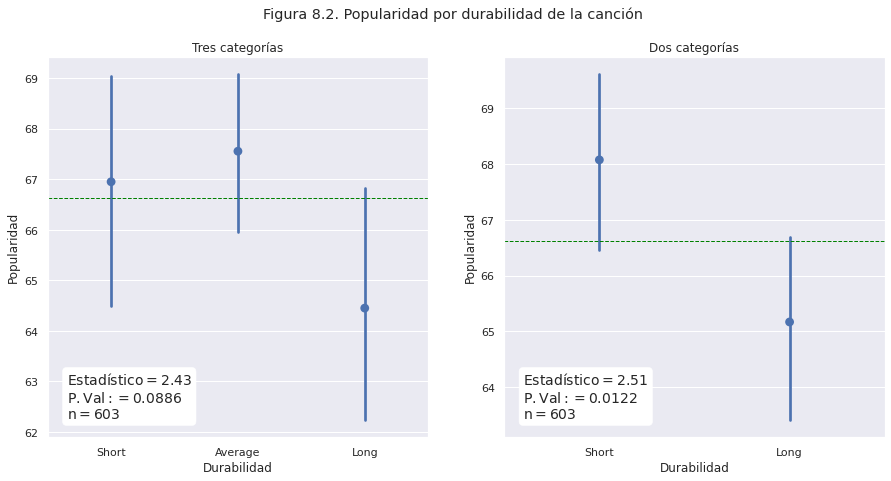

In [86]:
plt.figure(figsize=(15,7))
sns.set_theme()

plt.suptitle('Figura 8.2. Popularidad por durabilidad de la canción''\n')

plt.subplot(1,2,1)
ax = sns.pointplot(x='dur_cat', y='popu', data=spoti, join=0, order=['Short', 'Average', 'Long'])
ax.axhline(y=spoti['popu'].mean(), linewidth=1, linestyle='dashed', color='green')

t, p = stats.f_oneway(spoti.loc[spoti.dur_cat == 'Short']['popu'], spoti.loc[spoti.dur_cat == 'Average']['popu'], spoti.loc[spoti.dur_cat == 'Long']['popu'])
n = len(spoti.dur)
props = dict(boxstyle='round', facecolor='white', lw=0.5)
textstr = '$\mathrm{Estadístico}=%.2f$\n$\mathrm{P.Val:}=%.4f$\n$\mathrm{n}=%.0f$'%(t, p, n)
ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=14, bbox=props)
ax.set_xlabel('Durabilidad')
ax.set_ylabel('Popularidad')
ax.set_title('Tres categorías')

plt.subplot(1,2,2)
ax = sns.pointplot(x='dur_cat_d', y='popu', data=spoti, join=0, order=['Short', 'Long'])
ax.axhline(y=spoti['popu'].mean(), linewidth=1, linestyle='dashed', color='green')

t, p = stats.ttest_ind(spoti.loc[spoti.dur_cat_d == 'Short']['popu'], spoti.loc[spoti.dur_cat_d == 'Long']['popu'])
props = dict(boxstyle='round', facecolor='white', lw=0.5)
textstr = '$\mathrm{Estadístico}=%.2f$\n$\mathrm{P.Val:}=%.4f$\n$\mathrm{n}=%.0f$'%(t, p, n)
ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=14, bbox=props)
ax.set_xlabel('Durabilidad')
ax.set_ylabel('Popularidad')
ax.set_title('Dos categorías')

plt.show()


sns.reset_orig()

###Miniconclusión

Con los resultados obtenidos en los análisis estadísticos, rechazando la hipótesis nula del segundo t-test, se confirma la existencia de una relación altamente significativa, aunque bastante débil (como se verá en la regresión lineal), entre la duración de una canción con su popularidad.

Concretamente, de media, las canciones de menor duración serán más populares que las largas.

#9.Lyrics

###Descripción

In [87]:
print(spoti.lyrics.describe())

count    603.000000
mean       8.374793
std        7.475686
min        3.000000
25%        4.000000
50%        5.000000
75%        9.000000
max       48.000000
Name: lyrics, dtype: float64


###Gráfico

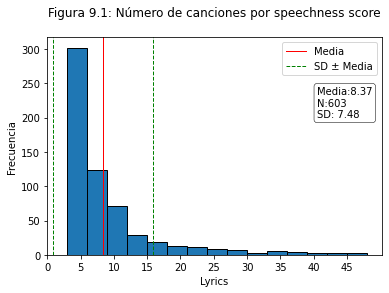

In [88]:
lyr = spoti['lyrics']
plt.hist(lyr, bins=15, edgecolor='black')
plt.xlabel('Lyrics')
plt.xticks(np.arange(0, 48, step=5))
plt.ylabel('Frecuencia')
props = dict(boxstyle= 'round', facecolor='white', lw=0.5)
plt.text(40.5,200,'Media:8.37''\n''N:603' '\n' 'SD: 7.48', bbox=props)
plt.title('Figura 9.1: Número de canciones por speechness score''\n')
plt.axvline(8.37, linewidth=1, linestyle='solid', color = 'red')
plt.axvline(0.88, linewidth=1, linestyle= 'dashed', color= 'green')
plt.axvline(15.84, linewidth=1, linestyle= 'dashed', color= 'green')
plt.legend(labels=['Media', 'SD ± Media'])
plt.show()

###Comparación con popu

In [89]:
lyr= spoti["lyrics"]
popularidad=spoti["popu"]
pearsonr (lyr,popularidad)
r, p_val = pearsonr(lyr,popularidad)
n = len(spoti["popu"])
print('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

r: -0.051 P.Val: 0.21 n: 603


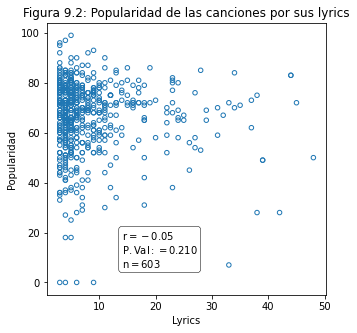

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(lyr,popularidad, s=20, facecolors='none', edgecolors='C0')
plt.title('Figura 9.2: Popularidad de las canciones por sus lyrics') 
plt.ylabel('Popularidad') 
plt.xlabel('Lyrics') 
props = dict(boxstyle='round', facecolor='white', lw=0.5)
textstr = '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (14,6, textstr , bbox=props)
plt.show()

###Miniconclusion

Al ser el p-value mayor que nuestro nivel de significación (0.05), aceptamos la hipotesis nula. Por lo tanto, la cantidad de letra de las canciones no influye en su popularidad.

#Regresión Lineal

In [91]:
from statsmodels.formula.api import ols
model1 = ols('popu ~ year2 + dnce + dur + nrgy + bpm + val + genre + lyrics', data=spoti).fit()
print(model1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.037    
Dependent Variable: popu             AIC:                4902.7315
Date:               2021-12-24 12:31 BIC:                4942.3488
No. Observations:   603              Log-Likelihood:     -2442.4  
Df Model:           8                F-statistic:        3.889    
Df Residuals:       594              Prob (F-statistic): 0.000174 
R-squared:          0.050            Scale:              195.95   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          71.6704   7.0612 10.1499 0.0000 57.8024 85.5384
year2[T.2015-2019]  4.1771   1.2144  3.4396 0.0006  1.7920  6.5622
genre[T.pop]       -0.5793   1.4115 -0.4104 0.6817 -3.3514  2.1929
dnce                0.0645   0.0522  1.2351 0.2173 -0.0381  0.1670
dur          

In [92]:
spoti['nrgy_sqr'] = spoti.nrgy**2

model2 = ols('popu ~ year2 + dnce + nrgy_sqr', data=spoti).fit()
print(model2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.039    
Dependent Variable: popu             AIC:                4896.4092
Date:               2021-12-24 12:31 BIC:                4914.0169
No. Observations:   603              Log-Likelihood:     -2444.2  
Df Model:           3                F-statistic:        9.179    
Df Residuals:       599              Prob (F-statistic): 6.04e-06 
R-squared:          0.044            Scale:              195.51   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          61.8986   3.1633 19.5679 0.0000 55.6862 68.1111
year2[T.2015-2019]  4.3240   1.1730  3.6864 0.0002  2.0203  6.6276
dnce                0.0889   0.0438  2.0287 0.0429  0.0028  0.1749
nrgy_sqr           -0.0007   0.0003 -2.2933 0.0222 -0.0012 -0.0001
-------------

In [93]:
spoti['dnce_sqr'] = spoti.dnce**2
spoti['val_sqr'] = spoti.val**2
spoti['dur_sqr'] = spoti.dur**2

model3 = ols('popu ~ year2 + dnce + nrgy_sqr', data=spoti).fit()
print(model3.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.039    
Dependent Variable: popu             AIC:                4896.4092
Date:               2021-12-24 12:31 BIC:                4914.0169
No. Observations:   603              Log-Likelihood:     -2444.2  
Df Model:           3                F-statistic:        9.179    
Df Residuals:       599              Prob (F-statistic): 6.04e-06 
R-squared:          0.044            Scale:              195.51   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          61.8986   3.1633 19.5679 0.0000 55.6862 68.1111
year2[T.2015-2019]  4.3240   1.1730  3.6864 0.0002  2.0203  6.6276
dnce                0.0889   0.0438  2.0287 0.0429  0.0028  0.1749
nrgy_sqr           -0.0007   0.0003 -2.2933 0.0222 -0.0012 -0.0001
-------------

In [94]:
spoti['bpm_sqr'] = spoti.bpm**2

model4 = ols('popu ~ year2 + nrgy_sqr + dur_sqr', data=spoti).fit()
print(model4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.041    
Dependent Variable: popu             AIC:                4895.0489
Date:               2021-12-24 12:31 BIC:                4912.6566
No. Observations:   603              Log-Likelihood:     -2443.5  
Df Model:           3                F-statistic:        9.651    
Df Residuals:       599              Prob (F-statistic): 3.15e-06 
R-squared:          0.046            Scale:              195.07   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          72.3360   2.8618 25.2764 0.0000 66.7156 77.9564
year2[T.2015-2019]  3.9582   1.1932  3.3174 0.0010  1.6149  6.3016
nrgy_sqr           -0.0007   0.0003 -2.4888 0.0131 -0.0013 -0.0002
dur_sqr            -0.0001   0.0000 -2.3404 0.0196 -0.0001 -0.0000
-------------

In [95]:

spoti['nrgy_sqr3'] = spoti.nrgy**3
spoti['dnce_sqr3'] = spoti.dnce**3
spoti['val_sqr3'] = spoti.val**3
spoti['dur_sqr3'] = spoti.dur**3
spoti['bpm_sqr3'] = spoti.bpm**3

model5 = ols('popu ~ year2 + nrgy_sqr3 + dur_sqr3', data=spoti).fit()
print(model5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.043    
Dependent Variable: popu             AIC:                4893.8996
Date:               2021-12-24 12:31 BIC:                4911.5073
No. Observations:   603              Log-Likelihood:     -2442.9  
Df Model:           3                F-statistic:        10.05    
Df Residuals:       599              Prob (F-statistic): 1.81e-06 
R-squared:          0.048            Scale:              194.69   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          69.9625   2.0426 34.2519 0.0000 65.9510 73.9740
year2[T.2015-2019]  3.8974   1.1921  3.2693 0.0011  1.5561  6.2387
nrgy_sqr3          -0.0000   0.0000 -2.7412 0.0063 -0.0000 -0.0000
dur_sqr3           -0.0000   0.0000 -2.3434 0.0194 -0.0000 -0.0000
-------------

In [96]:
model6 = ols('popu ~ year2 + nrgy_sqr3 + dur_sqr', data=spoti).fit()
print(model6.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.044    
Dependent Variable: popu             AIC:                4893.5908
Date:               2021-12-24 12:31 BIC:                4911.1984
No. Observations:   603              Log-Likelihood:     -2442.8  
Df Model:           3                F-statistic:        10.16    
Df Residuals:       599              Prob (F-statistic): 1.56e-06 
R-squared:          0.048            Scale:              194.59   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          71.8535   2.6113 27.5168 0.0000 66.7252 76.9819
year2[T.2015-2019]  3.8389   1.1955  3.2110 0.0014  1.4909  6.1868
nrgy_sqr3          -0.0000   0.0000 -2.7676 0.0058 -0.0000 -0.0000
dur_sqr            -0.0001   0.0000 -2.4086 0.0163 -0.0002 -0.0000
-------------

In [97]:
from numpy import log
spoti['nrgy_log'] = log(spoti.nrgy)
spoti['dnce_log'] = log(spoti.dnce)
spoti['val_log'] = log(spoti.val)
spoti['dur_log'] = log(spoti.dur)
spoti['bpm_log'] = log(spoti.bpm)

model7 = ols('popu ~ year2 + nrgy_sqr3 + dur_sqr + dnce_log', data=spoti).fit()
print(model7.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.048    
Dependent Variable: popu             AIC:                4891.6660
Date:               2021-12-24 12:31 BIC:                4913.6755
No. Observations:   603              Log-Likelihood:     -2440.8  
Df Model:           4                F-statistic:        8.631    
Df Residuals:       598              Prob (F-statistic): 8.91e-07 
R-squared:          0.055            Scale:              193.66   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          51.1532  10.7944  4.7389 0.0000 29.9537 72.3528
year2[T.2015-2019]  3.7263   1.1940  3.1209 0.0019  1.3814  6.0713
nrgy_sqr3          -0.0000   0.0000 -2.9439 0.0034 -0.0000 -0.0000
dur_sqr            -0.0001   0.0000 -2.0800 0.0379 -0.0001 -0.0000
dnce_log     

Modelo 8

In [98]:
model8 = ols('popu ~ year2 + nrgy_sqr3 + dur_sqr + dnce_log', data=spoti).fit()
print(model8.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.048    
Dependent Variable: popu             AIC:                4891.6660
Date:               2021-12-24 12:31 BIC:                4913.6755
No. Observations:   603              Log-Likelihood:     -2440.8  
Df Model:           4                F-statistic:        8.631    
Df Residuals:       598              Prob (F-statistic): 8.91e-07 
R-squared:          0.055            Scale:              193.66   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          51.1532  10.7944  4.7389 0.0000 29.9537 72.3528
year2[T.2015-2019]  3.7263   1.1940  3.1209 0.0019  1.3814  6.0713
nrgy_sqr3          -0.0000   0.0000 -2.9439 0.0034 -0.0000 -0.0000
dur_sqr            -0.0001   0.0000 -2.0800 0.0379 -0.0001 -0.0000
dnce_log     

In [99]:
spoti['val_inv'] = 1/spoti.val
spoti['bpm_inv'] = 1/spoti.bpm
spoti['dur_inv'] = 1/spoti.dur

model9 = ols('popu ~ year2 + nrgy_sqr3 + dur_sqr + dnce_log +val_inv', data=spoti).fit()
print(model9.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.050    
Dependent Variable:   popu             AIC:                4891.5436
Date:                 2021-12-24 12:31 BIC:                4917.9551
No. Observations:     603              Log-Likelihood:     -2439.8  
Df Model:             5                F-statistic:        7.339    
Df Residuals:         597              Prob (F-statistic): 1.09e-06 
R-squared:            0.058            Scale:              193.30   
--------------------------------------------------------------------
                    Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept           60.3798  12.5199  4.8227 0.0000  35.7915 84.9682
year2[T.2015-2019]   3.8223   1.1947  3.1993 0.0015   1.4759  6.1687
nrgy_sqr3           -0.0000   0.0000 -3.2296 0.0013  -0.0000 -0.0000
dur_sqr             -0.0001   0.0000 -1.9135 0.0562  

El modelo a elegir es el modelo 8 porque es el que tiene más variables significativas y la r cuadrado mayor.

Cabe destacar que la r cuadrado es muy bajita, lo que implica que las variables escogidas no son muy representativas a la hora de explicar la variabilidad de los datos de la variable popularidad. De hecho, nuestro modelo de regresión solamente explica el 5,5% de la varianza de la popularidad.

Para conseguir este porcentaje, hemos tenido que transformar las variables para que, al combinarlas, nos diese el p valor menor a 0,05. Las transformaciones que hemos hecho han sido:

*   La energía al cubo
*   La duración al cuadrado
*   El logaritmo de la danzabilidad

La ecuación del modelo de regresión quedaría de la siguiente manera:

\
$$popu = 51.15 + 3.73* year2 - 0* nrgy\_sqr3 - 0.0001* dur\_sqr + 4.93* dnce\_log$$

\
La popularidad aumentará en 3.73 puntos si el año pertenece al grupo 2015-2019.

La popularidad disminuirá en 0.0 puntos por cada unidad que aumente la energía al cubo.

La polularidad disminuirá en 0.0001 puntos por cada unidad que aumente la duración de la canción al cuadrado.

La popularidad aumentará en 4.93 puntos por cada unidad que aumente el logaritmo de la bailabilidad.

Si las variables predictoras valiesen todas 0, la popularidad seria de 51.15 puntos.


#Conclusiones

Teniendo en cuenta los resultados anteriores y el análisis de las variables del dataset, se ha comprobado que las mismas tienen un impacto muy débil en la popularidad de una canción.

Las variables que han resultado significativas en nuestro dataset han sido Eneregía, Danzabilidad y Año. Ademas, estas variables nos han servido para nuestro modelo de regresión aunque hayan tenido que ser transformadas.

A pesar de todo, el impacto de estas variables en la popularidad de una canción no han sido muy alto.

En la propuesta de un posible trabajo que mejore el modelo de predicción, podría ser bastante interesante la obtención e incorporación de nuevas variables como:
- La temática de la canción
- Registro del lenguaje empleado
- Idioma
- Armonía empleada en la canción
- Acordes
- Tipo de voz de los cantantes

Para recabar dichos datos, sería necesario el empleo de modelos de inteligencia artificial avanzados (como podría ser el de procesamiento de lenguaje natural) que quedan fuera del alcance del presente trabajo.